<a href="https://colab.research.google.com/github/TaiteInnes/Assignment_2-TaiteInnes/blob/main/Assignment2__TaiteInnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 2 - Taite Innes
# 220028998
# github access: https://github.com/TaiteInnes/Assignment_2-TaiteInnes?tab=readme-ov-file#assignment_2-taiteinnes

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install lonboard

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, SolidPolygonLayer


In [ ]:
pip install mapclassify

T1 & T2: load the chicago_parcels dataset and view the attributes and data type

In [135]:
#Data Exploration: load Chicago parcels & view rows and attributes
chicago_parcels=gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Lab2/Data/chicago_parcels')
chicago_parcels


,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.61, 1092301.306 ..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.19 ..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."
...,...,...,...,...,...,...
592516,592517,588217,0.00,-2147483648,-2147483648,"POLYGON ((1198269.792 1832592.793, 1198394.873..."
592517,592518,588218,0.00,-2147483648,-2147483648,"POLYGON ((1198410.986 1832594.443, 1198534.158..."
592518,592519,588216,0.00,-2147483648,-2147483648,"POLYGON ((1198602.435 1832596.186, 1198724.787..."
592519,592520,588215,0.00,-2147483648,-2147483648,"POLYGON ((1198742.539 1832597.464, 1198864.615..."


In [136]:
#convert to a geodataframe
chicago_gdf= gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Lab2/Data/chicago_parcels')
chicago_gdf


,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.61, 1092301.306 ..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.19 ..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."
...,...,...,...,...,...,...
592516,592517,588217,0.00,-2147483648,-2147483648,"POLYGON ((1198269.792 1832592.793, 1198394.873..."
592517,592518,588218,0.00,-2147483648,-2147483648,"POLYGON ((1198410.986 1832594.443, 1198534.158..."
592518,592519,588216,0.00,-2147483648,-2147483648,"POLYGON ((1198602.435 1832596.186, 1198724.787..."
592519,592520,588215,0.00,-2147483648,-2147483648,"POLYGON ((1198742.539 1832597.464, 1198864.615..."


In [ ]:
chicago_gdf.shape

(592521, 8)

In [ ]:
chicago_gdf.columns

Index(['POLY_ID', 'ID', 'AREA', 'PIN_OLD', 'PIN', 'geometry', 'longitude',
       'latitude'],
      dtype='object')

In [ ]:
#remove null values
(chicago_gdf["latitude"].isnull() | chicago_gdf["longitude"].isnull()).mean()

0.0

In [ ]:
#Remove null values
chicago_gdf = chicago_gdf[(chicago_gdf["longitude"].notnull() & chicago_gdf["latitude"].notnull())]

In [ ]:
#check the removed values
(chicago_gdf["latitude"].isnull() | chicago_gdf["longitude"].isnull()).mean()

0.0

In [ ]:
chicago_gdf.total_bounds

array([1091173.15922881, 1813913.37750871, 1205119.21461458,
       1952997.78968386])

T3 Create a map to visualise the chicago_parcels dataset

<Axes: >

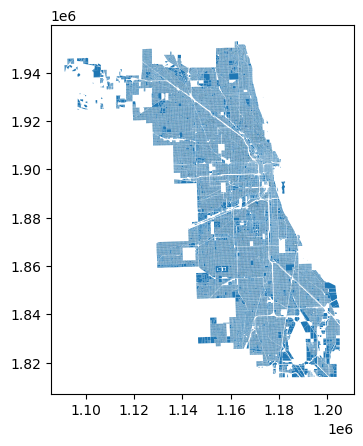

In [134]:
chicago_parcels.plot()


T4: Correlation Analysis: explore correlations between spatial attributes (lat,lon) & numerical attributes

In [138]:
# Ensure longitude and latitude columns exist
chicago_gdf["longitude"] = chicago_gdf.geometry.centroid.x
chicago_gdf["latitude"] = chicago_gdf.geometry.centroid.y


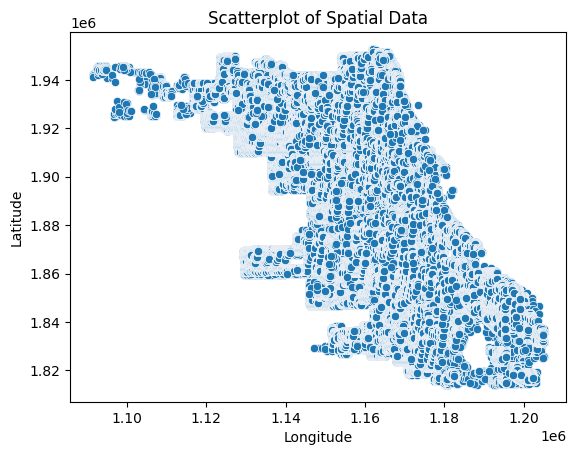

In [139]:
# Scatterplot using longitude and latitude
sns.scatterplot(data=chicago_gdf, x="longitude", y="latitude")
plt.title("Scatterplot of Spatial Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In veiwing the correlation of the data within the 'geometry' (longitude, latitute) we can see that the data is very packed, therefore making it difficult to assume any correlation within the data. As this is the case, correltations can only be observed through a K-Means Clustering, shown below.

T5/T6: Implement K-Means Clustering with different values of of n-clusters. Visualise the results using different lonboard maps

In [140]:
def assign_to_clusters(chicago_gdf, centroids):
    # Compute distances from each data point to each centroid, linalg is a popular way to do it, find out more in the numpy documentation.
    distances = np.linalg.norm(chicago_gdf[:, np.newaxis] - centroids, axis=2)

    # Assign each data point to the cluster of the nearest centroid
    clusters = np.argmin(distances, axis=1)
    return clusters

In [141]:
def update_centroids(chicago_gdf, clusters, k):
    # Update centroids based on the mean of data points in each cluster
    centroids = np.array([chicago_gdf[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

In [142]:
def k_means(chicago_gdf, k, max_iterations=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(chicago_gdf, k) #See how I can call a function inside another one.

    for iteration in range(max_iterations):
        # Assign data points to clusters
        clusters = assign_to_clusters(chicago_gdf, centroids) # again in here.

        #Update centroids
        new_centroids = update_centroids(chicago_gdf, clusters, k)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids


    return clusters, centroids


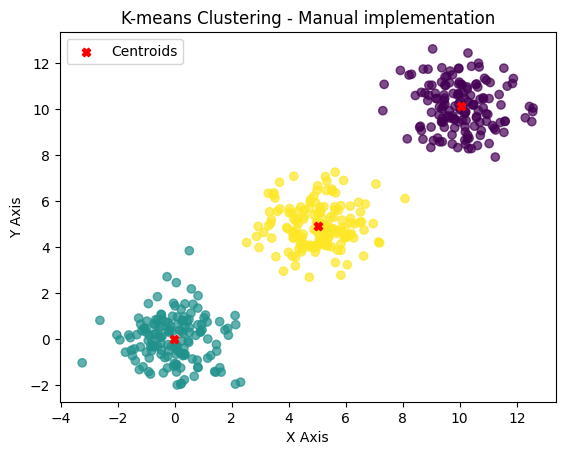

In [143]:
# Generate k=3 cluster
np.random.seed(42)
chicago_gdf = np.concatenate([np.random.normal(loc=0, scale=1, size=(150, 2)),
                       np.random.normal(loc=5, scale=1, size=(150, 2)),
                       np.random.normal(loc=10, scale=1, size=(150, 2))])

def initialize_centroids(chicago_gdf, k):
    """Initialize centroids randomly from the data points."""
    indices = np.random.choice(chicago_gdf.shape[0], k, replace=False)
    centroids = chicago_gdf[indices]
    return centroids

# K-means algorithm with k=3
k = 3
clusters, final_centroids = k_means(chicago_gdf, k)

# Visualize the results in a scattler plot.,
plt.scatter(chicago_gdf[:, 0], (chicago_gdf)[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-means Clustering - Manual implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

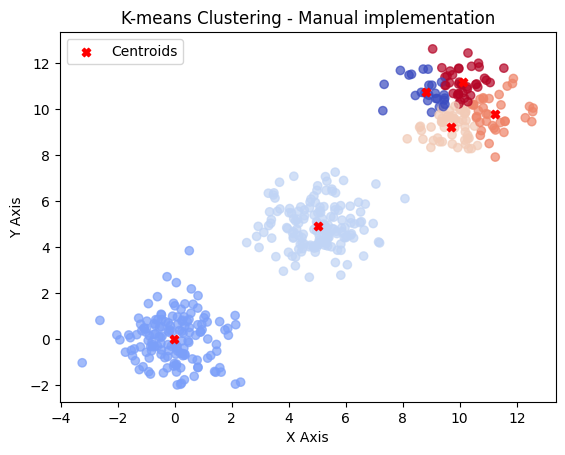

In [144]:
# Generate k=6 cluster
np.random.seed(42)
chicago_gdf = np.concatenate([np.random.normal(loc=0, scale=1, size=(150, 2)),
                       np.random.normal(loc=5, scale=1, size=(150, 2)),
                       np.random.normal(loc=10, scale=1, size=(150, 2))])

def initialize_centroids(chicago_gdf, k):
    """Initialize centroids randomly from the data points."""
    indices = np.random.choice(chicago_gdf.shape[0], k, replace=False)
    centroids = chicago_gdf[indices]
    return centroids

# K-means algorithm with k=3
k = 6
clusters, final_centroids = k_means(chicago_gdf, k)

# Visualize the results in a scattler plot.,
plt.scatter(chicago_gdf[:, 0], (chicago_gdf)[:, 1], c=clusters, cmap='coolwarm', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-means Clustering - Manual implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

T7:Evaluate the clustering results and choose an 'optimal' value for n_clusters.

Based on the two cluster graphs above, the optimal value for n-clusters is three. Visually, n=3 seems to evenly distribute the data into 3 equally distant and equally sized groups.

T8:DBSCAN Clustering (at least three)

In [145]:
def find_neighbors(chicago_gdf, point_index, epsilon):
    # Find indices of data points within epsilon distance from the given point
    distances = np.linalg.norm(chicago_gdf - chicago_gdf[point_index], axis=1)
    neighbors = np.where(distances <= epsilon)[0]
    return neighbors

In [146]:
def expand_cluster(chicago_gdf, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited):
    # Assign the point to the current cluster
    clusters[point_index] = cluster_id

    # Expand the cluster by iterating over neighbors
    for neighbor_index in neighbors:
        if not visited[neighbor_index]:
            visited[neighbor_index] = True
            new_neighbors = find_neighbors(data, neighbor_index, epsilon)

            # Check if the neighbor has enough neighbors to be a core point
            if len(new_neighbors) >= min_samples:
                neighbors = np.union1d(neighbors, new_neighbors)

        # Assign the neighbor to the current cluster if not assigned to any cluster
        if clusters[neighbor_index] == -1:
            clusters[neighbor_index] = cluster_id

In [147]:
def dbscan(chicago_gdf, epsilon, min_samples):
    # Initialize variables
    num_points = len(chicago_gdf)
    clusters = np.full(num_points, -1)  # -1 represents unassigned points
    visited = np.full(num_points, False)

    # Initialize cluster ID
    cluster_id = 0

    for point_index in range(num_points):
        if not visited[point_index]:
            visited[point_index] = True
            neighbors = find_neighbors(chicago_gdf, point_index, epsilon)

            # Check if the point is a core point
            if len(neighbors) >= min_samples:
                expand_cluster(chicago_gdf, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited)
                cluster_id += 1

    return clusters

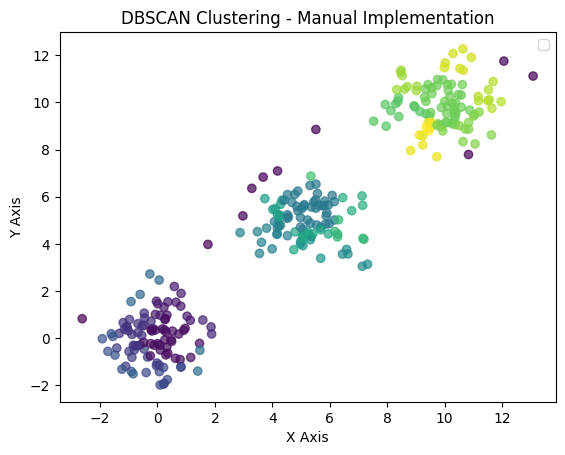

In [148]:
#EPS:1 & Min-Samples:5

np.random.seed(42)
chicago_gdf = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)),
                       np.random.normal(loc=5, scale=1, size=(100, 2)),
                       np.random.normal(loc=10, scale=1, size=(100, 2))])

# Run DBSCAN algorithm with epsilon=1 and min_samples=5
epsilon = 1
min_samples = 5
clusters = dbscan(chicago_gdf, epsilon, min_samples)

# Visualize the results
plt.scatter(chicago_gdf[:, 0], chicago_gdf[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering - Manual Implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

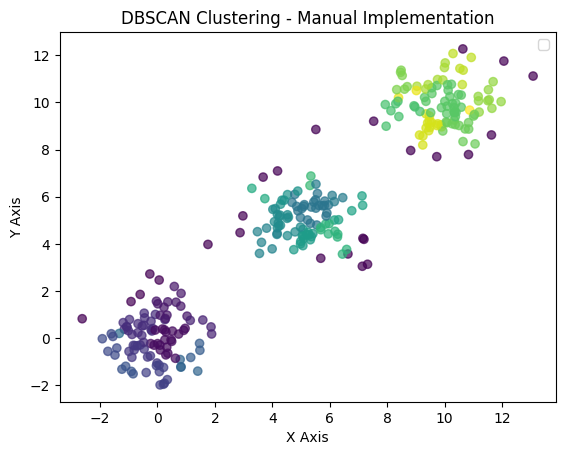

In [149]:
#EPS:0.8 Min-Samples:5
np.random.seed(42)
chicago_gdf = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)),
                       np.random.normal(loc=5, scale=1, size=(100, 2)),
                       np.random.normal(loc=10, scale=1, size=(100, 2))])

# Run DBSCAN algorithm with epsilon=1 and min_samples=5
epsilon = 0.8
min_samples = 5
clusters = dbscan(chicago_gdf, epsilon, min_samples)

# Visualize the results
plt.scatter(chicago_gdf[:, 0], chicago_gdf[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering - Manual Implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

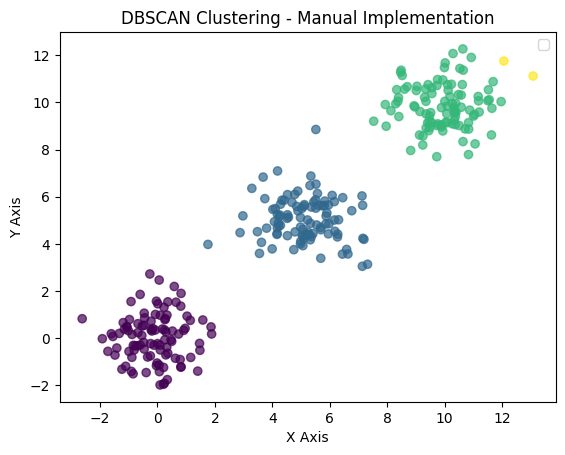

In [153]:
#EPS:4 Min-Samples:5
np.random.seed(42)
chicago_gdf = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)),
                       np.random.normal(loc=5, scale=1, size=(100, 2)),
                       np.random.normal(loc=10, scale=1, size=(100, 2))])

# Run DBSCAN algorithm with epsilon=1 and min_samples=5
epsilon = 4
min_samples = 5
clusters = dbscan(chicago_gdf, epsilon, min_samples)

# Visualize the results
plt.scatter(chicago_gdf[:, 0], chicago_gdf[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering - Manual Implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

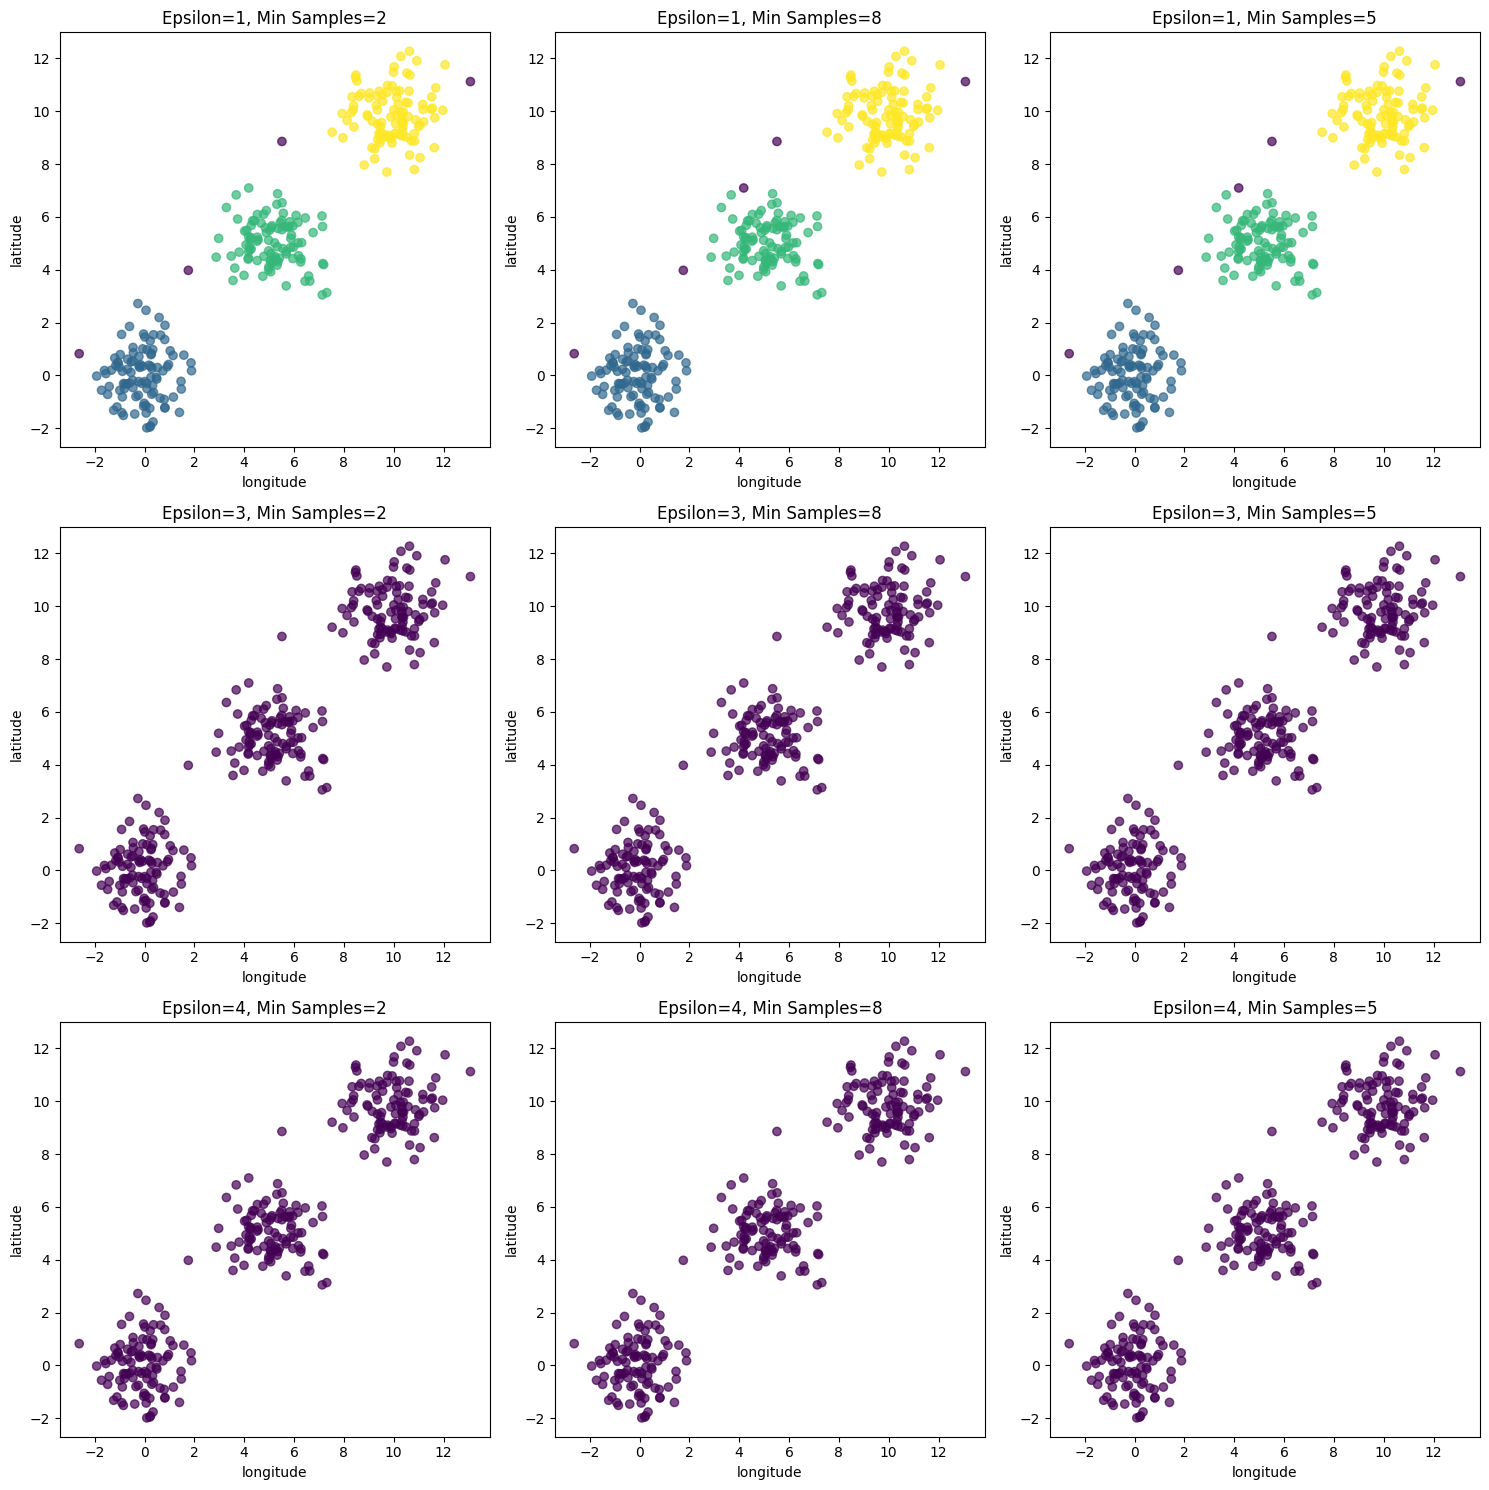

In [156]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np # Added for np.array


# Function to visualize DBSCAN parameters
def visualize_dbscan_parameters(chicago_gdf, epsilon_values, min_samples_values):
    fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 15))
    # Change 1: Accessing columns by index for NumPy array

    coords = chicago_gdf[:, [0, 1]]

    for i, epsilon in enumerate(epsilon_values):
        for j, min_samples in enumerate(min_samples_values):
            # Apply DBSCAN with current parameters
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            clusters_result = dbscan.fit_predict(coords)  # Compute clusters

            # Plot the clusters
            axes[i, j].scatter(coords[:, 0], coords[:, 1], c=clusters_result, cmap='viridis', alpha=0.7)
            axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')
            # Change 2: Using generic labels since we don't have column names
            axes[i, j].set_xlabel('longitude')
            axes[i, j].set_ylabel('latitude')

    plt.tight_layout()
    plt.show()

# Example usage
epsilon_values = [1, 3, 4]  # Replace with your desired epsilon values
min_samples_values = [2, 8, 5]  # Replace with your desired min_samples values

# Run your function to visualize DBSCAN parameters
visualize_dbscan_parameters(chicago_gdf, epsilon_values, min_samples_values)

T10:A small EPS has fewer points within the neighborhood which causes the data to have more clusters with higher points that are defined as 'noise'. A larger EPS changes the actual cluster size making the groupings larger and more uniform. Smaller sample sizes change the sensitivity of the data so more points are included. A larger sample value is more strict and only classifies the denser data points. Based on the clustering results above an EPS of 1 and sample size of 5 shows the best cluster distribution as it clearly outlines the natural groupings. In terms of context within the data, it identifies high-density areas within chicago which is important information when it comes to infastructure development and natural land use.  